# Data and modules loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import os
import math
import re
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
!pip install transformers

Mounted at /content/drive


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the Dataset
!kaggle datasets download -d jacksoncrow/stock-market-dataset
!unzip /content/stock-market-dataset.zip


In [ ]:
T3=pd.read_csv('/content/drive/MyDrive/Aymen_PFE/raw_partner_headlines.csv')
T3

In [ ]:
Ss=[]
folder='/content/stocks'
sts = os.listdir(folder)
L=T3.stock.unique()
for s in tqdm(sts) :
    if s.split('.')[0] in L :
        Ss+=[s]

In [ ]:
Lens=[]
for i in range(len(Ss)):
  S0=pd.read_csv(folder+'/'+Ss[i])
  Lens+=[len(S0)]
Lens

In [ ]:
S0.tail()

In [ ]:
import  matplotlib.pyplot as plt
datasets=[]
for i in range(10):
    # Simulating random 'Close' prices for each dataset
    datasets.append(pd.read_csv(folder+'/'+Ss[i])[['Date','Close']])

# Plotting the 10 datasets on the same graph
plt.figure(figsize=(12, 8))

# Colors for each dataset
colors = plt.cm.get_cmap('tab10', 10)

for idx, dataset in enumerate(datasets):
    plt.plot(dataset['Date'], dataset['Close'], label=f'Dataset {idx+1}', color=colors(idx), marker='o')

# Adding labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices Across 10 Different Datasets')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

# Data Preparation

In [ ]:
T3['Date']=[x.split(' ')[0] for x in T3.date]
Tot=pd.DataFrame(columns=['Unnamed: 0','headline','url','publisher','date','stock','Date','Open','High','Low','Close','Adj Close','Volume'])
for s in tqdm(Ss):
    S=pd.read_csv(folder+'/'+s)
    S['stock']=s.split('.')[0]
    T=T3.loc[T3.stock==s.split('.')[0]]
    T0=T.merge(S,on=['Date','stock'],how='left').reset_index().drop('index',axis=1)
    Tot=pd.concat([Tot,T0])

In [ ]:
Tot0=Tot.reset_index().drop(Tot.loc[Tot.Open.isnull()==True].index).reset_index().drop(columns=['index','Unnamed: 0','date','level_0'])

In [ ]:
Tot02.loc[Tot02.Open.isnull()==False]

,index,headline,url,publisher,stock,Date,Open,High,Low,Close,Adj Close,Volume
16,1854,Heat Transfer Film Market to Reflect a Holisti...,http://www.gurufocus.com/news/1092531/heat-tra...,GuruFocus,HA,2020-04-01,10.160000,10.310000,9.610000,9.840000,9.840000,1664200.0
17,1855,Hawaiian Holdings Stock Plunges 45% in a Month...,http://www.zacks.com/stock/news/845072/hawaiia...,Zacks,HA,2020-03-30,10.750000,11.090000,10.010000,10.600000,10.600000,1409100.0
18,1856,Orthopedic Implant Coatings Market New Investm...,http://www.gurufocus.com/news/1089144/orthoped...,GuruFocus,HA,2020-03-30,10.750000,11.090000,10.010000,10.600000,10.600000,1409100.0
19,1857,"Airline Stock Roundup: U.S. Stimulus Aid, DAL'...",http://www.zacks.com/stock/news/838993/airline...,Zacks,HA,2020-03-27,12.000000,12.260000,11.000000,11.070000,11.070000,2390700.0
20,1858,Ericsson Takes Further Precautionary Measures ...,http://www.gurufocus.com/news/1085780/ericsson...,GuruFocus,HA,2020-03-26,13.280000,13.610000,12.040000,12.600000,12.600000,3018300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1356,26167,Big Trouble In Big China?,https://seekingalpha.com/article/4231836-big-t...,Seeking Alpha,CHN,2019-01-07,17.049999,17.410000,17.000000,17.219999,16.155098,50000.0
1358,26169,"Markets rebound as China, U.S. outline trade t...",https://seekingalpha.com/news/3420571-markets-...,Seeking Alpha,CHN,2019-01-04,16.510000,17.030001,16.510000,16.969999,15.920558,180400.0
1359,26170,Our Best Charts And Calls Of 2018,https://seekingalpha.com/article/4231165-best-...,Seeking Alpha,CHN,2019-01-02,16.639999,16.840000,16.639999,16.709999,15.676637,2500.0
1360,26171,China slowdown triggers rocky start to 2019,https://seekingalpha.com/news/3419853-china-sl...,Seeking Alpha,CHN,2019-01-02,16.639999,16.840000,16.639999,16.709999,15.676637,2500.0


In [ ]:
Tot01=Tot0.loc[Tot0.Date>'2019']
min_stocks=list(Tot01.groupby('stock').count().loc[Tot01.groupby('stock').count().Open<200].reset_index().stock)
Tot02=Tot01.drop(Tot01.loc[Tot01.stock.isin(min_stocks)].index).reset_index()


In [ ]:
Tot02.loc[Tot02.]

,index,headline,url,publisher,stock,Date,Open,High,Low,Close,Adj Close,Volume
0,1838,Should I Buy Airline Stocks Now Or Wait?,https://talkmarkets.com/content/should-i-buy-a...,TalkMarkets,HA,2020-05-13,NaN,NaN,NaN,NaN,NaN,NaN
1,1839,"Lesa Sroufe & Co Buys iShares Silver Trust, Ha...",http://www.gurufocus.com/news/1131463/lesa-sro...,GuruFocus,HA,2020-05-08,NaN,NaN,NaN,NaN,NaN,NaN
2,1840,"Airline Stock Roundup: AAL, UAL & Others Post ...",http://www.zacks.com/stock/news/915954/airline...,Zacks,HA,2020-05-06,NaN,NaN,NaN,NaN,NaN,NaN
3,1841,Expeditors (EXPD) to Post Q1 Earnings: What's ...,http://www.zacks.com/stock/news/913287/expedit...,Zacks,HA,2020-05-04,NaN,NaN,NaN,NaN,NaN,NaN
4,1842,Euronav (EURN) to Post Q1 Earnings: What's in ...,http://www.zacks.com/stock/news/913312/euronav...,Zacks,HA,2020-05-04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1361,26172,China slowdown triggers rocky start to 2019,https://seekingalpha.com/news/3419853-china-sl...,Seeking Alpha,CHN,2019-01-02,16.639999,16.84,16.639999,16.709999,15.676637,2500.0
1362,26173,What Trade War Are We Having Will Determine Wh...,https://seekingalpha.com/article/4230999-trade...,Seeking Alpha,CHN,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1363,26174,New Year Questions About The Economic Outlook,https://seekingalpha.com/article/4230990-new-y...,Seeking Alpha,CHN,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1364,26175,"Xi: Cooperation best choice for China, U.S.",https://seekingalpha.com/news/3419839-xi-coope...,Seeking Alpha,CHN,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from transformers import pipeline
go_emotions = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions")

In [ ]:
Res=[]
for j in tqdm(Tot02.iloc[:,1]):
    Res+=[go_emotions(j,top_k=None)]

100%|██████████| 2244/2244 [06:09<00:00,  6.07it/s]


In [ ]:
R0=[]
for i in tqdm(range(len(Res))):
    D={}
    for j in Res[i]:
        D[j['label']]=j['score']
    R0 += [D]

100%|██████████| 2244/2244 [00:00<00:00, 80953.15it/s]


In [ ]:
TT=pd.concat([Tot02.reset_index().drop('index',axis=1),pd.DataFrame(R0)],axis=1)
TT1=TT.drop(TT.loc[TT.Open.isnull()==True].index)

In [ ]:
TT1=pd.read_csv('/content/drive/MyDrive/Aymen_PFE/TT01.csv')

In [ ]:
TT1

,Unnamed: 0,level_0,headline,url,publisher,stock,Date,Open,High,Low,...,desire,gratitude,surprise,caring,embarrassment,nervousness,grief,relief,remorse,pride
0,0,0,Moving Average Crossover Alert: Capital One Fi...,http://www.zacks.com/stock/news/848818/moving-...,Zacks,COF,2020-04-01,46.430000,46.630001,44.000000,...,0.001468,0.001415,0.001388,0.001361,0.000839,0.000586,0.000557,0.000546,0.000508,0.000465
1,1,1,Capital One Financial Corporation to Webcast C...,http://www.gurufocus.com/news/1085989/capital-...,GuruFocus,COF,2020-03-26,55.570000,61.400002,54.459999,...,0.001947,0.004489,0.003437,0.001512,0.000979,0.000950,0.000811,0.000796,0.000734,0.000564
2,2,2,Improve Your Retirement Income with These 3 To...,http://www.zacks.com/stock/news/836227/improve...,Zacks,COF,2020-03-26,55.570000,61.400002,54.459999,...,0.007938,0.003012,0.000368,0.234768,0.000259,0.000799,0.000493,0.003061,0.000682,0.001124
3,3,3,T. Rowe Price (TROW) CEO's Compensation for 20...,http://www.zacks.com/stock/news/836256/t-rowe-...,Zacks,COF,2020-03-26,55.570000,61.400002,54.459999,...,0.002444,0.000875,0.000787,0.002379,0.000279,0.000399,0.000285,0.000741,0.000344,0.000670
4,4,4,Capital One Financial CEO Fairbank's 2019 Pay ...,http://www.zacks.com/stock/news/829903/capital...,Zacks,COF,2020-03-23,43.389999,44.939999,42.029999,...,0.002711,0.000950,0.001794,0.001678,0.000240,0.000260,0.000242,0.000753,0.000298,0.000756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111463,111463,111463,Pan American Silver takeover of Tahoe Resource...,https://seekingalpha.com/news/3421728-pan-amer...,Seeking Alpha,PAAS,2019-01-09,15.200000,15.520000,15.160000,...,0.005172,0.003049,0.000556,0.001871,0.000406,0.000236,0.000214,0.001764,0.000330,0.001977
111464,111464,111464,Top 20 Gold And Silver Mining Producers For 2019,https://seekingalpha.com/article/4231905-top-2...,Seeking Alpha,PAAS,2019-01-07,15.170000,15.250000,15.010000,...,0.005046,0.001194,0.001139,0.000985,0.000316,0.000353,0.000265,0.000266,0.000238,0.000460
111465,111465,111465,"Merger Arbitrage Mondays - January 7, 2018",https://seekingalpha.com/article/4231741-merge...,Seeking Alpha,PAAS,2019-01-07,15.170000,15.250000,15.010000,...,0.002100,0.003078,0.006474,0.000731,0.000608,0.001056,0.000403,0.001095,0.000294,0.000419
111466,111466,111466,Stock Upgrades: Pan American Silver Shows Risi...,http://www.investors.com/ibd-data-stories/stoc...,Investor's Business Daily,PAAS,2019-01-04,14.640000,15.070000,14.420000,...,0.001513,0.004070,0.001284,0.002945,0.000781,0.000584,0.000705,0.002095,0.000813,0.002676


# Predictions

In [ ]:
TT0=TT00.drop(columns=['level_0']).reset_index().drop(columns=['index','url'])

NameError: name 'TT00' is not defined

In [ ]:
TT1=Tot00

In [ ]:
TT1.columns

Index(['Unnamed: 0', 'level_0', 'headline', 'url', 'publisher', 'stock',
       'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'neutral', 'approval', 'realization', 'annoyance', 'excitement',
       'disappointment', 'joy', 'sadness', 'confusion', 'disapproval',
       'admiration', 'optimism', 'fear', 'disgust', 'anger', 'amusement',
       'curiosity', 'love', 'desire', 'gratitude', 'surprise', 'caring',
       'embarrassment', 'nervousness', 'grief', 'relief', 'remorse', 'pride'],
      dtype='object')

In [ ]:
TT1[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'neutral', 'approval', 'realization', 'annoyance', 'excitement',
       'disappointment', 'joy', 'sadness', 'confusion', 'disapproval',
       'admiration', 'optimism', 'fear', 'disgust', 'anger', 'amusement',
       'curiosity', 'love', 'desire', 'gratitude', 'surprise', 'caring',
       'embarrassment', 'nervousness', 'relief', 'remorse', 'pride']]

,Date,Open,High,Low,Close,Adj Close,Volume,neutral,approval,realization,...,desire,gratitude,surprise,caring,embarrassment,nervousness,grief,relief,remorse,pride
0,2020-04-01,46.430000,46.630001,44.000000,44.680000,44.680000,7347600.0,0.965338,0.015575,0.008005,...,0.001468,0.001415,0.001388,0.001361,0.000839,0.000586,0.000557,0.000546,0.000508,0.000465
1,2020-03-26,55.570000,61.400002,54.459999,57.869999,57.869999,6026300.0,0.924786,0.006402,0.004687,...,0.001947,0.004489,0.003437,0.001512,0.000979,0.000950,0.000811,0.000796,0.000734,0.000564
2,2020-03-26,55.570000,61.400002,54.459999,57.869999,57.869999,6026300.0,0.728298,0.117287,0.007211,...,0.007938,0.003012,0.000368,0.234768,0.000259,0.000799,0.000493,0.003061,0.000682,0.001124
3,2020-03-26,55.570000,61.400002,54.459999,57.869999,57.869999,6026300.0,0.927508,0.052866,0.010595,...,0.002444,0.000875,0.000787,0.002379,0.000279,0.000399,0.000285,0.000741,0.000344,0.000670
4,2020-03-23,43.389999,44.939999,42.029999,42.869999,42.869999,6720900.0,0.893532,0.072322,0.010035,...,0.002711,0.000950,0.001794,0.001678,0.000240,0.000260,0.000242,0.000753,0.000298,0.000756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111463,2019-01-09,15.200000,15.520000,15.160000,15.450000,15.263045,1177700.0,0.373312,0.647334,0.014679,...,0.005172,0.003049,0.000556,0.001871,0.000406,0.000236,0.000214,0.001764,0.000330,0.001977
111464,2019-01-07,15.170000,15.250000,15.010000,15.120000,14.937038,1489500.0,0.924032,0.012561,0.004294,...,0.005046,0.001194,0.001139,0.000985,0.000316,0.000353,0.000265,0.000266,0.000238,0.000460
111465,2019-01-07,15.170000,15.250000,15.010000,15.120000,14.937038,1489500.0,0.829055,0.028132,0.035575,...,0.002100,0.003078,0.006474,0.000731,0.000608,0.001056,0.000403,0.001095,0.000294,0.000419
111466,2019-01-04,14.640000,15.070000,14.420000,14.960000,14.778975,1890300.0,0.895295,0.063824,0.013689,...,0.001513,0.004070,0.001284,0.002945,0.000781,0.000584,0.000705,0.002095,0.000813,0.002676


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
_df_12['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
S={}
target=['Open','High', 'Low', 'Close', 'Adj Close', 'Volume']
D_names={}
for n in target:
    D_names[n]=n+'_previous'

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
TT1['publisher'] = label_encoder.fit_transform(TT1['publisher'])
TT1['stock'] = label_encoder.fit_transform(TT1['stock'])

for s in tqdm(TT1.stock.unique()):
    S[s]=TT1.loc[TT1.stock==s]
    S[s]['day']=[x.day for x in pd.to_datetime(S[s]['Date'])]
    S[s]['month']=[x.month for x in pd.to_datetime(S[s]['Date'])]
    S[s]['year']=[x.year for x in pd.to_datetime(S[s]['Date'])]
    S[s]['Diff_days']=list(abs(pd.to_datetime(S[s]['Date']).diff().dt.days)[1:])+[0.0]
    S[s]=S[s].drop(columns=['Date','url'])
    S[s]=pd.concat([S[s],S[s][['Open','High', 'Low', 'Close', 'Adj Close', 'Volume']].shift(-1).rename(columns=D_names)],axis=1)

Streaming output truncated to the last 5000 lines.
<ipython-input-4-8ceaa2516869>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[s]['Diff_days']=list(abs(pd.to_datetime(S[s]['Date']).diff().dt.days)[1:])+[0.0]
<ipython-input-4-8ceaa2516869>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[s]['day']=[x.day for x in pd.to_datetime(S[s]['Date'])]
<ipython-input-4-8ceaa2516869>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [ ]:
TT=S[list(S.keys())[0]]
for s in tqdm(TT1.stock.unique()[1:]):
  S[s]['stock']=s
  TT=pd.concat([TT,S[s]])
TT['Class'] = [1 if x < y
               else (2 if x > y
                     else 0)
               for x, y in zip(TT['Open_previous'], TT['Open'])]
Counter(TT.Class)

100%|██████████| 337/337 [00:08<00:00, 37.53it/s]


Counter({2: 25549, 0: 56934, 1: 28985})

In [ ]:
TT.columns

Index(['Unnamed: 0', 'level_0', 'headline', 'publisher', 'stock', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume', 'neutral', 'approval',
       'realization', 'annoyance', 'excitement', 'disappointment', 'joy',
       'sadness', 'confusion', 'disapproval', 'admiration', 'optimism', 'fear',
       'disgust', 'anger', 'amusement', 'curiosity', 'love', 'desire',
       'gratitude', 'surprise', 'caring', 'embarrassment', 'nervousness',
       'grief', 'relief', 'remorse', 'pride', 'day', 'month', 'year',
       'Diff_days', 'Open_previous', 'High_previous', 'Low_previous',
       'Close_previous', 'Adj Close_previous', 'Volume_previous', 'Class'],
      dtype='object')

In [ ]:
TT0=TT.drop(columns=['Unnamed: 0', 'level_0', 'headline', 'publisher','Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume',])

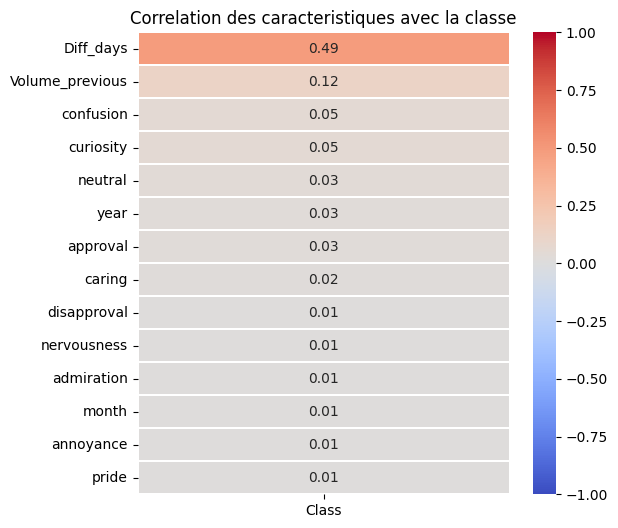

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
sns.heatmap(abs(TT0.corr()[['Class']]).sort_values(by='Class', ascending=False)[1:15], annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.1, linecolor='white')
plt.title('Correlation des caracteristiques avec la classe')
plt.show()

# Viz

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string

# Charger le dataset

# Exemple de filtrage des données par classe
texts1 = TT[TT['Class'] == 1]['headline']
texts0 = TT[TT['Class'] == 0]['headline']
texts_1 = TT[TT['Class'] == -1]['headline']

# Prétraiter les textes
def preprocess_text(text):
    text = text.lower()  # Mettre en minuscules
    text = text.translate(str.maketrans('', '', string.punctuation))  # Supprimer la ponctuation
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))  # Supprimer les stop words
    return text



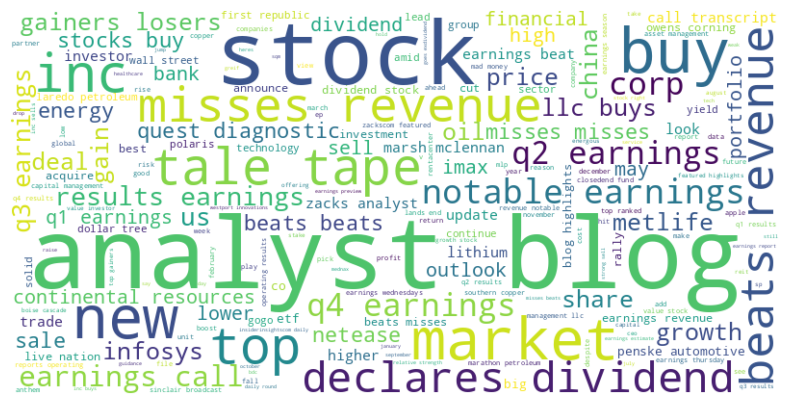

In [ ]:
# Appliquer le prétraitement à tous les textes
processed_texts = ' '.join(preprocess_text(text) for text in texts_1)

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_texts)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ne pas afficher les axes
plt.show()

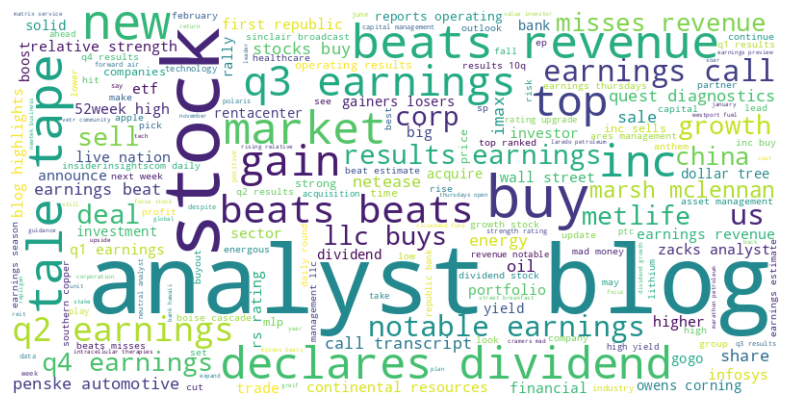

In [ ]:
# Appliquer le prétraitement à tous les textes
processed_texts = ' '.join(preprocess_text(text) for text in texts1)

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_texts)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ne pas afficher les axes
plt.show()

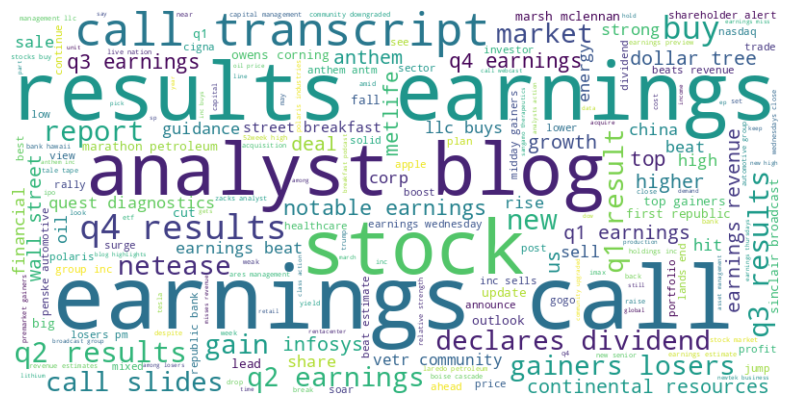

In [ ]:
# Appliquer le prétraitement à tous les textes
processed_texts = ' '.join(preprocess_text(text) for text in texts0)

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_texts)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ne pas afficher les axes
plt.show()

In [ ]:
 cols=['neutral', 'disappointment', 'sadness',
       'annoyance', 'realization', 'approval', 'disapproval', 'optimism',
       'fear', 'disgust', 'anger', 'embarrassment', 'nervousness', 'amusement',
       'caring', 'desire', 'confusion', 'grief', 'joy', 'remorse', 'surprise',
       'curiosity', 'admiration', 'relief', 'excitement', 'love', 'pride',
       'gratitude','Class']

In [ ]:
drop_sent=['pride','remorse','relief','embarrassment','grief']

In [ ]:
TT4.describe().iloc[:,10:]

,anger,embarrassment,nervousness,amusement,caring,desire,confusion,grief,joy,remorse,surprise,curiosity,admiration,relief,excitement,love,pride,gratitude,Class
count,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000
mean,0.002256,0.001179,0.001356,0.001927,0.002904,0.003635,0.021197,0.000718,0.004123,0.001051,0.005531,0.046880,0.016414,0.001020,0.008606,0.002883,0.000966,0.002092,0.017828
std,0.011937,0.001942,0.009247,0.003967,0.011402,0.015738,0.065940,0.000923,0.007867,0.002379,0.036708,0.145453,0.059311,0.001528,0.023225,0.025636,0.002051,0.004356,0.722014
min,0.000247,0.000105,0.000073,0.000271,0.000330,0.000521,0.000269,0.000094,0.000426,0.000139,0.000256,0.000227,0.000536,0.000120,0.000349,0.000353,0.000044,0.000133,-1.000000
25%,0.000961,0.000459,0.000348,0.001303,0.001010,0.001301,0.001599,0.000365,0.001497,0.000369,0.000880,0.001236,0.002043,0.000387,0.001874,0.001026,0.000300,0.000809,-1.000000
50%,0.001406,0.000629,0.000461,0.001715,0.001427,0.001795,0.002297,0.000453,0.002092,0.000453,0.001328,0.001815,0.002952,0.000525,0.002848,0.001394,0.000420,0.001138,0.000000
75%,0.002067,0.000905,0.000884,0.002171,0.002093,0.002867,0.003849,0.000671,0.003493,0.000631,0.003035,0.003325,0.005007,0.001019,0.007135,0.002025,0.000671,0.001828,1.000000
max,0.483571,0.026940,0.376149,0.167511,0.263667,0.607703,0.569619,0.016917,0.134983,0.037965,0.745100,0.716854,0.840798,0.026025,0.512743,0.862028,0.030426,0.128213,1.000000


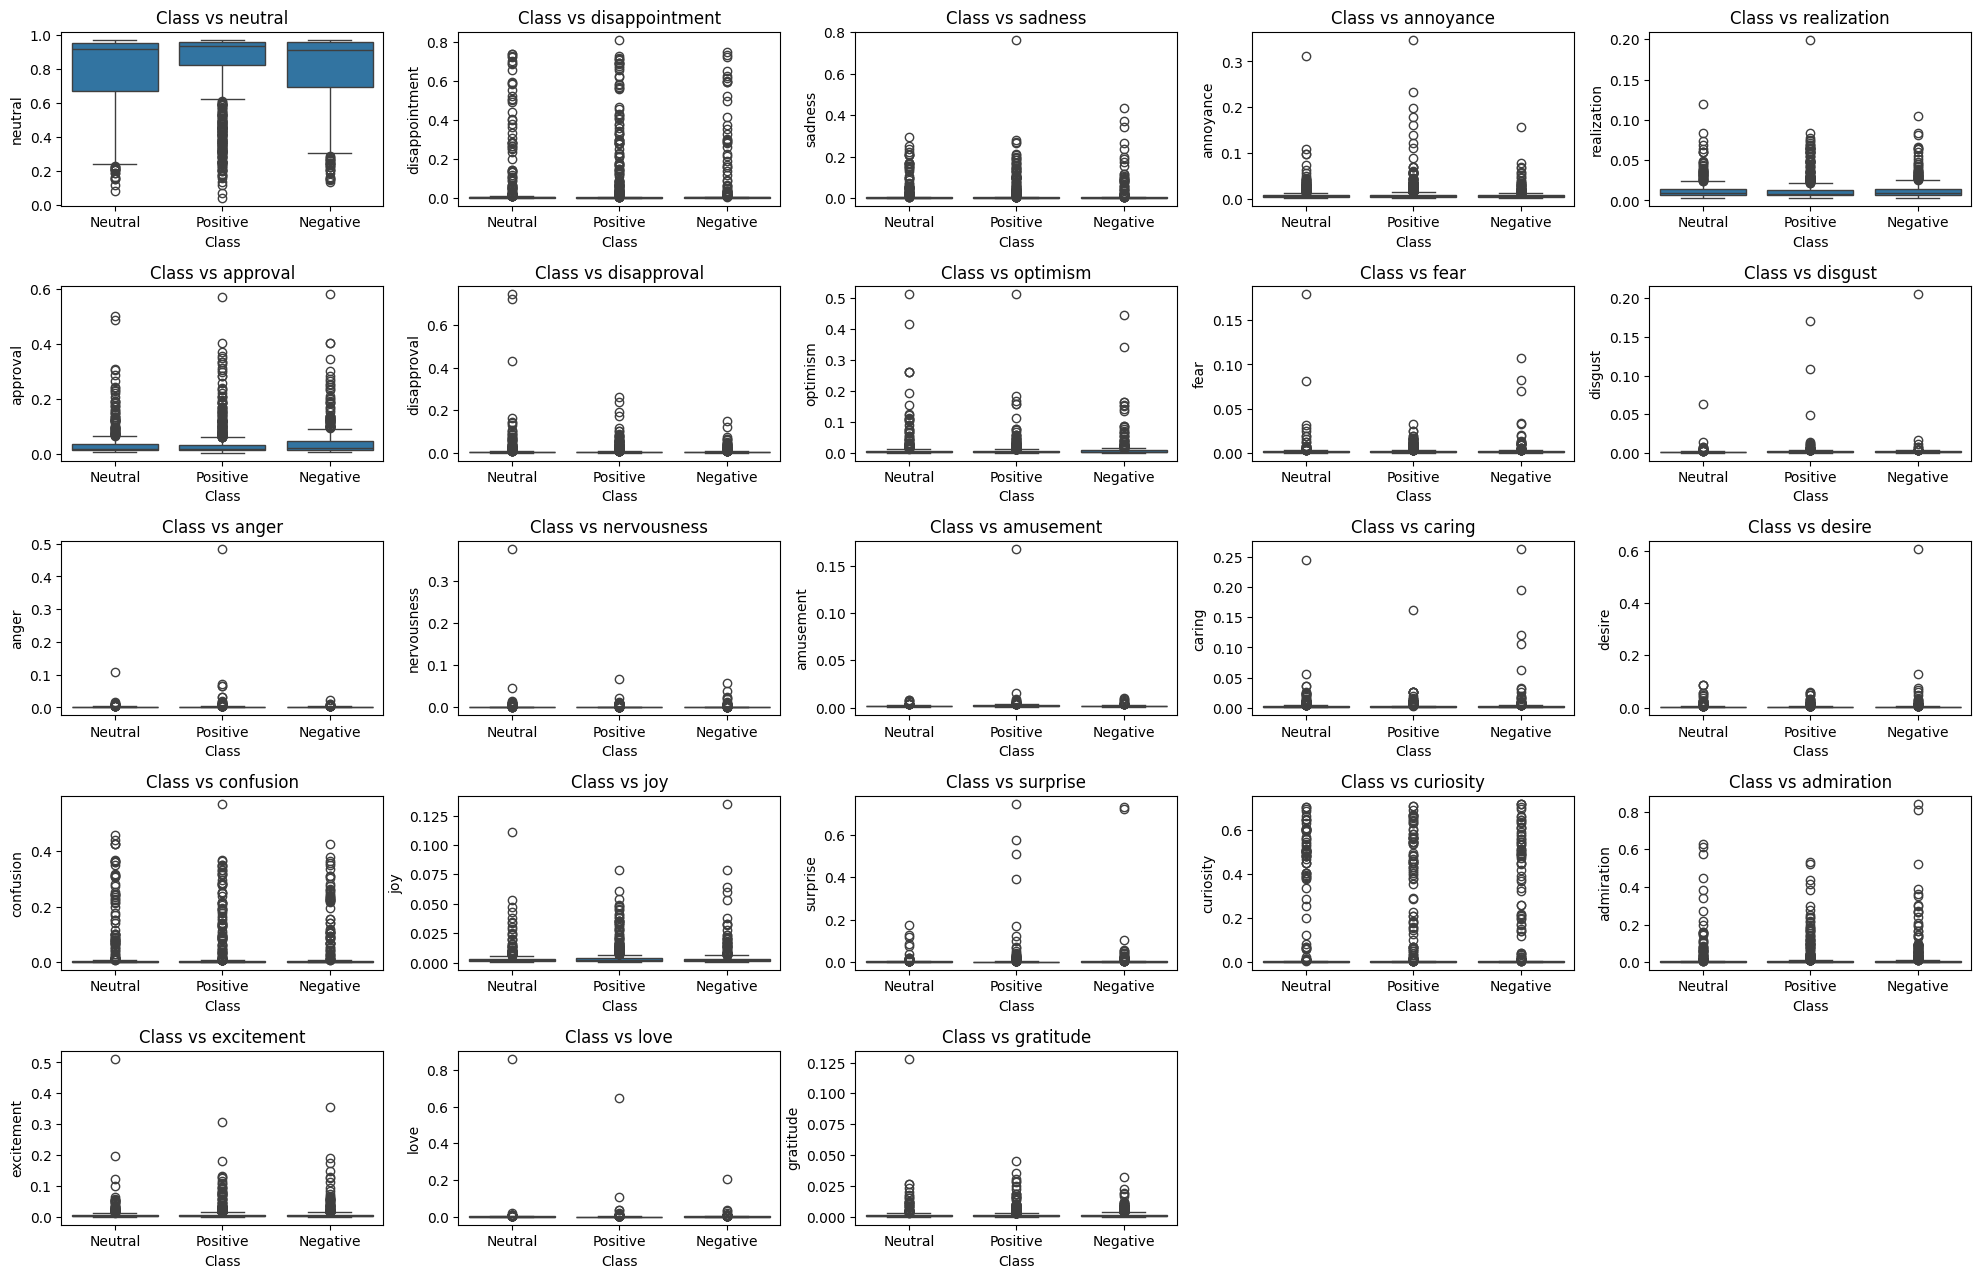

In [ ]:
TT4=TT[cols].drop(columns=drop_sent)
features = [col for col in TT4.columns if col != 'Class']

# Création de graphiques pour chaque caractéristique
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(6, 5, i)  # Ajuster le nombre de lignes et colonnes si nécessaire
    sns.boxplot(x='Class', y=feature, data=TT4)
    plt.title(f'Class vs {feature}')
    plt.xticks(ticks=[0, 1, 2], labels=['Neutral', 'Positive', 'Negative'])

plt.tight_layout()
plt.show()

# split

In [ ]:
S={}
X_train_all=pd.DataFrame([[0]*TT.shape[1]],columns=TT.columns)
X_test_all=pd.DataFrame([[0]*TT.shape[1]],columns=TT.columns)

for s in tqdm(TT.stock.unique()):
    S[s]=TT.loc[TT.stock==s]
    X_train_all=pd.concat([X_train_all,S[s].iloc[S[s].shape[0]//15:]])
    X_test_all=pd.concat([X_test_all,S[s].iloc[:S[s].shape[0]//15]])
X_test_all=X_test_all.drop(0).reset_index().drop('index',axis=1)
X_train_all=X_train_all.drop(0).reset_index().drop('index',axis=1)

100%|██████████| 338/338 [00:06<00:00, 54.58it/s]


In [ ]:
#Data for Regression
Y_train_all=X_train_all[['Open','High','Low','Close','Adj Close','Volume']]
Y_test_all=X_test_all[['Open','High','Low','Close','Adj Close','Volume']]
X_train_all=X_train_all.drop(['Open','High','Low','Close','Adj Close','Volume'],axis=1)
X_test_all=X_test_all.drop(['Open','High','Low','Close','Adj Close','Volume'],axis=1)

In [ ]:
#Data for Classification
y_train=X_train_all['Class']
y_test=X_test_all['Class']
X_train=X_train_all.drop('Class',axis=1)
X_test=X_test_all.drop('Class',axis=1)

In [ ]:

X_train=X_train.drop(columns=['Unnamed: 0','level_0','headline'])
X_test=X_test.drop(columns=['Unnamed: 0','level_0','headline'])

In [ ]:
X_train=X_train.drop(X_train.shape[0]-1)
X_test=X_test.drop(X_test.shape[0]-1)
y_train=y_train[:-1]
y_test=y_test[:-1]

In [ ]:
TT['Class']=TT['Class'].replace(0,'Stabilité').replace(1,'Augmentation').replace(2,'Diminution')

<ipython-input-59-19fd6404a3c0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='joy', data=Co, palette='Purples')


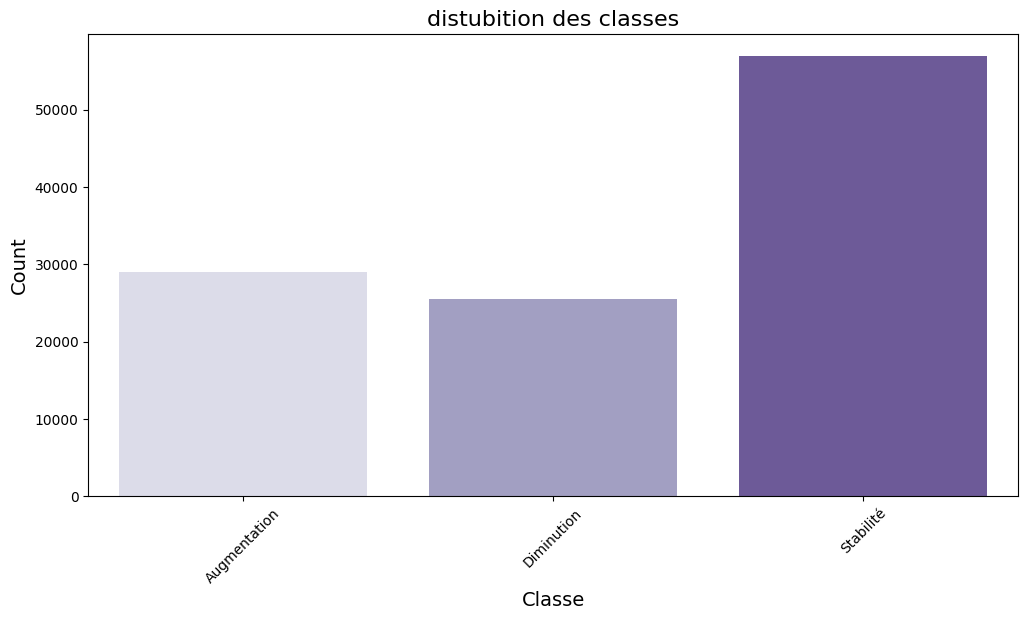

In [ ]:
import matplotlib.pyplot as plt
Co=TT.groupby('Class',as_index=False).count()[['Class','joy']]
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='joy', data=Co, palette='Purples')
plt.title('distubition des classes', fontsize=16)
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_train=X_train.fillna(0)
X_test=X_test.fillna(0)

In [ ]:
X_train

,publisher,stock,neutral,approval,realization,annoyance,excitement,disappointment,joy,sadness,...,day,month,year,Diff_days,Open_previous,High_previous,Low_previous,Close_previous,Adj Close_previous,Volume_previous
0,1,70,0.955699,0.019260,0.007149,0.004383,0.001940,0.002485,0.001728,0.002467,...,29,1,2020,1.0,102.089996,103.330002,101.339996,102.040001,101.645721,1990500.0
1,1,70,0.340737,0.557049,0.030362,0.002178,0.002456,0.001826,0.001872,0.001623,...,28,1,2020,5.0,106.419998,106.550003,105.199997,106.029999,105.620300,2110400.0
2,2,70,0.850790,0.076459,0.011062,0.002393,0.015712,0.002414,0.014296,0.002211,...,23,1,2020,1.0,105.000000,107.589996,104.550003,106.760002,106.347481,5725700.0
3,5,70,0.523311,0.038456,0.011952,0.003108,0.030268,0.009640,0.024375,0.006501,...,22,1,2020,1.0,103.300003,103.739998,102.190002,102.190002,101.795143,3077400.0
4,5,70,0.965250,0.010436,0.005876,0.005509,0.007016,0.003980,0.004627,0.003280,...,21,1,2020,0.0,103.300003,103.739998,102.190002,102.190002,101.795143,3077400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104189,3,258,0.734821,0.011819,0.007706,0.005489,0.001954,0.001511,0.000838,0.000866,...,9,1,2019,0.0,15.200000,15.520000,15.160000,15.450000,15.263045,1177700.0
104190,3,258,0.373312,0.647334,0.014679,0.006552,0.005436,0.002846,0.003159,0.000661,...,9,1,2019,2.0,15.170000,15.250000,15.010000,15.120000,14.937038,1489500.0
104191,3,258,0.924032,0.012561,0.004294,0.004215,0.007321,0.002257,0.001369,0.001259,...,7,1,2019,0.0,15.170000,15.250000,15.010000,15.120000,14.937038,1489500.0
104192,3,258,0.829055,0.028132,0.035575,0.003938,0.020808,0.001983,0.006107,0.001306,...,7,1,2019,3.0,14.640000,15.070000,14.420000,14.960000,14.778975,1890300.0


In [ ]:
y_train

,Class
0,1
1,2
2,1
3,1
4,0
...,...
104189,0
104190,1
104191,0
104192,1


In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_Over, y_train_Over = smote.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print(f"Resampled class distribution: {Counter(y_train_Over)}")


Resampled class distribution: Counter({1: 54106, 2: 54106, 0: 54106})


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# Apply Random Undersampling to balance the majority class
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Print class distribution after undersampling
print(f"Resampled class distribution: {Counter(y_train_under)}")

Resampled class distribution: Counter({0: 22949, 1: 22949, 2: 22949})


# Classification

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, Pool


In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    # Set average='weighted' for multiclass problems
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    return accuracy, f1, recall, precision

In [ ]:
X_train_pca

array([[-2924825.54175539],
       [-2804925.54180996],
       [  810374.45812252],
       ...,
       [-3425825.54046564],
       [-3025025.54046872],
       [-3226525.5404644 ]])

In [ ]:
from sklearn.decomposition import PCA
import lightgbm as lgb

pca = PCA(n_components=25)  # Garder 95% de la variance
X_train=X_train.fillna(0)
X_train_pca = pca.fit_transform(X_train_Over)
X_test_pca = pca.transform(X_test)
model=lgb.LGBMClassifier(num_leaves=10, learning_rate=0.1, n_estimators=5000,
                                    max_bin=250, bagging_fraction=0.8, bagging_freq=8,
                                    bagging_seed=10, feature_fraction=0.8,
                                    feature_fraction_seed=8, min_sum_hessian_in_leaf=15,
                                    verbose=-1)

model.fit(X_train_pca, y_train_Over)
Y_pred=model.predict(X_test_pca)

In [ ]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, Y_pred)
print(f"Exactitude : {accuracy:.2f}")


Exactitude : 0.82


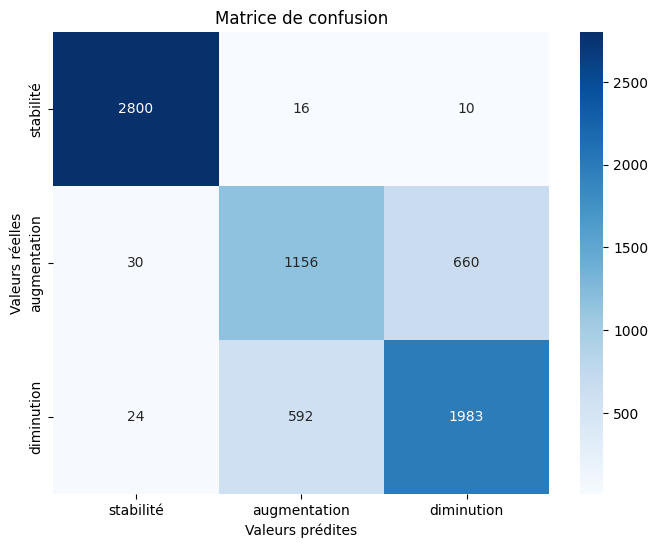

In [ ]:
cm = confusion_matrix(y_test, Y_pred, labels=[0, 1, 2])

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['stabilité', 'augmentation', 'diminution'], yticklabels=['stabilité', 'augmentation', 'diminution'])
plt.ylabel('Valeurs réelles')
plt.xlabel('Valeurs prédites')
plt.title('Matrice de confusion')
plt.show()

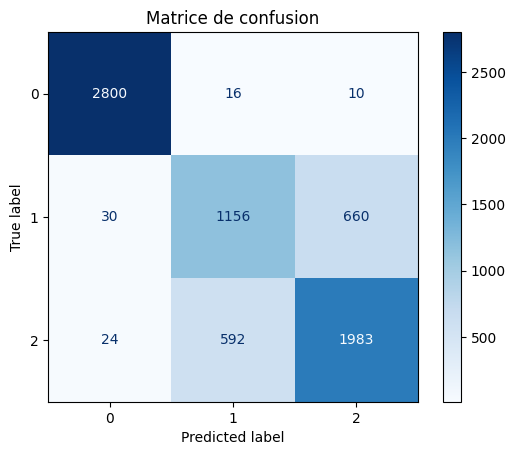

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, Y_pred)
Y0=['Diminution']
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.show()


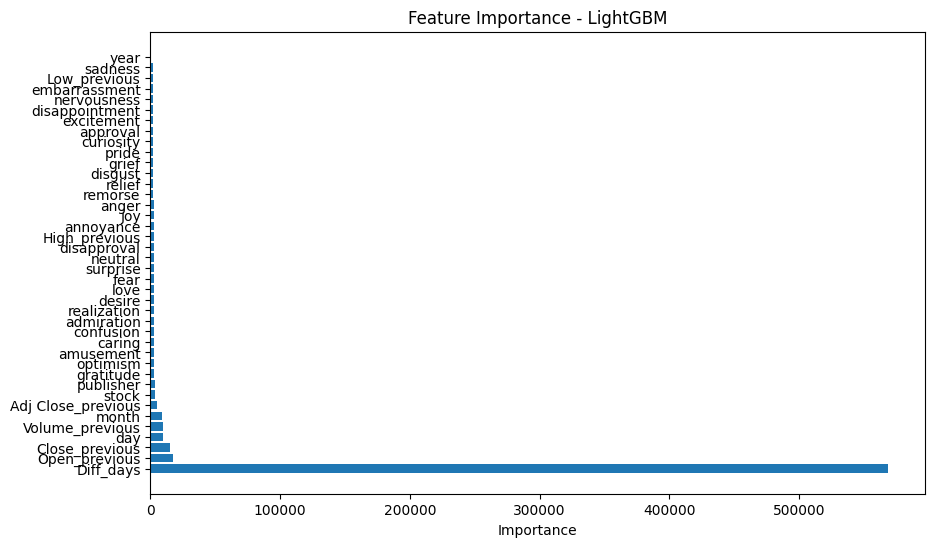

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming `model` is your trained LightGBM model and `X_train` is your training data

# Get feature importances
importance = model.booster_.feature_importance(importance_type='gain')
feature_names = X_train.columns  # Get feature names if X_train is a DataFrame

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - LightGBM')
plt.show()

In [ ]:
# Initialize models
models = {
    "LightGBM": lgb.LGBMClassifier(num_leaves=7, learning_rate=0.1, n_estimators=2000,
                                    max_bin=250, bagging_fraction=0.8, bagging_freq=8,
                                    bagging_seed=10, feature_fraction=0.8,
                                    feature_fraction_seed=8, min_sum_hessian_in_leaf=15,
                                    verbose=-1),
    "catboost": CatBoostClassifier(iterations=1000,learning_rate=0.1,depth=6,loss_function='MultiClass',verbose=False),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000)}

# Collect metrics
results = {}

for name, model in list(models.items()):
    accuracy, f1, recall, precision = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = [accuracy, f1, recall, precision]


Accuracy: 0.7846
F1 Score: 0.7843
Recall: 0.7846
Precision: 0.7841
Accuracy: 0.7733
F1 Score: 0.7725
Recall: 0.7733
Precision: 0.7721
Accuracy: 0.7101
F1 Score: 0.7117
Recall: 0.7101
Precision: 0.7270
Accuracy: 0.5459
F1 Score: 0.4755
Recall: 0.5459
Precision: 0.5886


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results

{'LightGBM': [0.7846238481639389,
  0.7842631454998144,
  0.7846238481639389,
  0.7841063529652745],
 'catboost': [0.7733461697153073,
  0.7724579989841278,
  0.7733461697153073,
  0.7721162401561569],
 'Random Forest': [0.7100811442717645,
  0.7117152041754854,
  0.7100811442717645,
  0.7269618067767557],
 'Logistic Regression': [0.5458671434465686,
  0.4755332182069416,
  0.5458671434465686,
  0.5886361737275059]}

In [ ]:
import lightgbm
lgb_model = lightgbm.LGBMClassifier(num_leaves=10,learning_rate=0.1,n_estimators=5000,max_bin=250,bagging_fraction=0.8,bagging_freq=8,
                       bagging_seed=10,feature_fraction=0.8,feature_fraction_seed=8,min_sum_hessian_in_leaf = 15,verbose=-1)


lgb_model.fit(X_train,y_train)
Y=lgb_model.predict(X_test)
accuracy_score(y_test,Y)

0.7955170517051705

In [ ]:
Y=lgb_model.predict(X_test)
accuracy_score(y_test,Y)

0.7955170517051705

In [ ]:
lgb_model.feature_importance(importance_type='gain')

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="ProsusAI/finbert")
Res_bert=[pipe(x) for x in tqdm(X_test_all.headline)]


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 7272/7272 [17:28<00:00,  6.93it/s]


In [ ]:
X_test_all['res_bert']=Res_bert
X_test_all

,Unnamed: 0,level_0,headline,publisher,stock,Open,High,Low,Close,Adj Close,...,year,Diff_days,Open_previous,High_previous,Low_previous,Close_previous,Adj Close_previous,Volume_previous,Class,res_bert
0,1,1,Capital One Financial Corporation to Webcast C...,1,70,55.570000,61.400002,54.459999,57.869999,57.869999,...,2020,0.0,55.570000,61.400002,54.459999,57.869999,57.869999,6026300.0,0,"[{'label': 'neutral', 'score': 0.9271302819252..."
1,2,2,Improve Your Retirement Income with These 3 To...,5,70,55.570000,61.400002,54.459999,57.869999,57.869999,...,2020,0.0,55.570000,61.400002,54.459999,57.869999,57.869999,6026300.0,0,"[{'label': 'neutral', 'score': 0.7524669170379..."
2,3,3,T. Rowe Price (TROW) CEO's Compensation for 20...,5,70,55.570000,61.400002,54.459999,57.869999,57.869999,...,2020,3.0,43.389999,44.939999,42.029999,42.869999,42.869999,6720900.0,1,"[{'label': 'positive', 'score': 0.727207362651..."
3,4,4,Capital One Financial CEO Fairbank's 2019 Pay ...,5,70,43.389999,44.939999,42.029999,42.869999,42.869999,...,2020,3.0,48.000000,48.299999,43.590000,45.009998,45.009998,8038300.0,2,"[{'label': 'positive', 'score': 0.878364086151..."
4,5,5,3 Top-Ranked Dividend Stocks: A Smarter Way to...,5,70,48.000000,48.299999,43.590000,45.009998,45.009998,...,2020,3.0,56.439999,57.150002,51.310001,53.919998,53.919998,10475200.0,2,"[{'label': 'neutral', 'score': 0.8140903115272..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,111274,111274,U.S. Stocks Hit New Highs As China Aids Corona...,2,258,24.170000,24.870001,23.980000,24.629999,24.572237,...,2020,1.0,22.600000,23.959999,22.250000,23.959999,23.903809,4395700.0,1,"[{'label': 'positive', 'score': 0.908270359039..."
7268,111275,111275,Stocks To Watch: Barrick Gold Flashes Buy Sign...,2,258,22.600000,23.959999,22.250000,23.959999,23.903809,...,2020,0.0,22.600000,23.959999,22.250000,23.959999,23.903809,4395700.0,0,"[{'label': 'positive', 'score': 0.639360606670..."
7269,111276,111276,Looking For Signs of Negative Divergence Among...,4,258,22.600000,23.959999,22.250000,23.959999,23.903809,...,2020,5.0,22.530001,22.980000,22.400000,22.510000,22.457211,3285300.0,1,"[{'label': 'negative', 'score': 0.895486831665..."
7270,111277,111277,"Options Trading: Amid Strong Sales Growth, Win...",2,258,22.530001,22.980000,22.400000,22.510000,22.457211,...,2020,0.0,22.530001,22.980000,22.400000,22.510000,22.457211,3285300.0,0,"[{'label': 'positive', 'score': 0.942920386791..."


In [ ]:
[i[0]['label'] for i in Res_bert]

['neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive'

In [ ]:
X_test['res_bert']=Res_bert
X_test['res_bert0']=[X_test.iloc[x,-2][0]['label'] for x in range(X_test.shape[0])]
X_test['res_bert0']=X_test['res_bert0'].replace(['positive'],1).replace(['negative','neutral'],0)


In [ ]:
y_test

,Class
0,0
1,0
2,1
3,2
4,2
...,...
7267,1
7268,0
7269,1
7270,0


In [ ]:
X_test_all['res_bert']=[i[0]['label'] for i in Res_bert]
X_test_all['res_bert']=X_test_all['res_bert'].replace('neutral',0).replace('positive',1).replace('negative',2)

accuracy = accuracy_score(y_test,X_test_all['res_bert'])
f1 = f1_score(y_test,X_test_all['res_bert'], average='weighted')
recall = recall_score(y_test,X_test_all['res_bert'], average='weighted')
precision = precision_score(y_test,X_test_all['res_bert'], average='weighted')
print(accuracy, f1, recall, precision)

0.3641364136413641 0.33778855341256675 0.3641364136413641 0.3616375175856357


# Regression

In [ ]:
X_train_all

,Unnamed: 0,level_0,headline,publisher,stock,neutral,approval,realization,annoyance,excitement,...,month,year,Diff_days,Open_previous,High_previous,Low_previous,Close_previous,Adj Close_previous,Volume_previous,Class
0,18,18,"Rdl Financial Inc Buys The Home Depot Inc, Val...",1,70,0.955699,0.019260,0.007149,0.004383,0.001940,...,1,2020,1.0,102.089996,103.330002,101.339996,102.040001,101.645721,1990500.0,1
1,19,19,Big-Picture Thinking May Improve Americans' Fi...,1,70,0.340737,0.557049,0.030362,0.002178,0.002456,...,1,2020,5.0,106.419998,106.550003,105.199997,106.029999,105.620300,2110400.0,2
2,20,20,Stock Upgrades: Capital One Financial Shows Ri...,2,70,0.850790,0.076459,0.011062,0.002393,0.015712,...,1,2020,1.0,105.000000,107.589996,104.550003,106.760002,106.347481,5725700.0,1
3,21,21,Capital One (COF) Stock Up 1% on Q4 Earnings &...,5,70,0.523311,0.038456,0.011952,0.003108,0.030268,...,1,2020,1.0,103.300003,103.739998,102.190002,102.190002,101.795143,3077400.0,1
4,22,22,"Trump in Davos, Global Economic Outlook, Netfl...",5,70,0.965250,0.010436,0.005876,0.005509,0.007016,...,1,2020,0.0,103.300003,103.739998,102.190002,102.190002,101.795143,3077400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104190,111463,111463,Pan American Silver takeover of Tahoe Resource...,3,258,0.373312,0.647334,0.014679,0.006552,0.005436,...,1,2019,2.0,15.170000,15.250000,15.010000,15.120000,14.937038,1489500.0,1
104191,111464,111464,Top 20 Gold And Silver Mining Producers For 2019,3,258,0.924032,0.012561,0.004294,0.004215,0.007321,...,1,2019,0.0,15.170000,15.250000,15.010000,15.120000,14.937038,1489500.0,0
104192,111465,111465,"Merger Arbitrage Mondays - January 7, 2018",3,258,0.829055,0.028132,0.035575,0.003938,0.020808,...,1,2019,3.0,14.640000,15.070000,14.420000,14.960000,14.778975,1890300.0,1
104193,111466,111466,Stock Upgrades: Pan American Silver Shows Risi...,2,258,0.895295,0.063824,0.013689,0.002686,0.009905,...,1,2019,1.0,14.760000,14.880000,14.560000,14.810000,14.630791,1688800.0,2


In [ ]:
X_train=X_train_all.drop('headline',axis=1)
X_test=X_test_all.drop('headline',axis=1)

In [ ]:
y_train.iloc[:-2]

,Open,High,Low,Close,Adj Close,Volume
0,102.360001,102.830002,101.129997,101.199997,100.808960,1883900.0
1,102.089996,103.330002,101.339996,102.040001,101.645721,1990500.0
2,106.419998,106.550003,105.199997,106.029999,105.620300,2110400.0
3,105.000000,107.589996,104.550003,106.760002,106.347481,5725700.0
4,103.300003,103.739998,102.190002,102.190002,101.795143,3077400.0
...,...,...,...,...,...,...
104187,14.910000,14.990000,14.410000,14.550000,14.373935,1411400.0
104188,15.040000,15.120000,14.770000,14.950000,14.769095,1181800.0
104189,15.200000,15.520000,15.160000,15.450000,15.263045,1177700.0
104190,15.200000,15.520000,15.160000,15.450000,15.263045,1177700.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialiser le scaler
scaler = MinMaxScaler()

# Appliquer la normalisation sur les données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Appliquer la normalisation sur les données de test
X_test_scaled = scaler.transform(X_test)


In [ ]:
import lightgbm
from sklearn.multioutput import MultiOutputRegressor
lgb_Reg = lightgbm.LGBMRegressor(num_leaves=10,learning_rate=0.1,n_estimators=5000,max_bin=250,bagging_fraction=0.8,bagging_freq=8,
                       bagging_seed=10,feature_fraction=0.8,feature_fraction_seed=8,min_sum_hessian_in_leaf = 15,verbose=-1)
multi_target_lgb = MultiOutputRegressor(lgb_Reg)
multi_target_lgb.fit(X_train_scaled, y_train.iloc[:-2])

MultiOutputRegressor(estimator=LGBMRegressor(bagging_fraction=0.8,
                                             bagging_freq=8, bagging_seed=10,
                                             feature_fraction=0.8,
                                             feature_fraction_seed=8,
                                             max_bin=250,
                                             min_sum_hessian_in_leaf=15,
                                             n_estimators=5000, num_leaves=10,
                                             verbose=-1))

In [ ]:
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Define the CatBoost Regressor correctly

RF_Reg = RandomForestRegressor(n_estimators=100)

# Initialize MultiOutputRegressor without parentheses around cat_Reg
multi_target_cat = MultiOutputRegressor(RF_Reg)

# Fit the model
multi_target_cat.fit(X_train, y_train.iloc[:-2])

KeyboardInterrupt: 

In [ ]:
y_test_pred = multi_target_lgb.predict(X_test_scaled)
Pred_data=pd.DataFrame(y_test_pred,columns=Y_test_all.columns)
Pred_data

,Open,High,Low,Close,Adj Close,Volume
0,54.933930,61.128417,53.703526,56.784669,57.479609,5.945622e+06
1,54.891004,61.149925,53.418920,56.566775,57.565136,6.263672e+06
2,44.143713,44.923802,41.670042,43.311904,42.948114,6.916644e+06
3,46.107835,45.699232,40.905457,42.285550,43.530396,9.014771e+06
4,52.778008,55.344370,49.404714,51.902661,52.171752,1.016800e+07
...,...,...,...,...,...,...
7264,22.934803,23.803556,23.802278,23.719362,23.415170,4.655878e+06
7265,24.879191,25.224744,24.447851,25.489500,25.440392,6.137240e+06
7266,24.202769,24.909604,23.943934,24.972479,24.963242,4.817748e+06
7267,22.802591,23.849509,22.792936,23.510345,23.914007,4.775104e+06


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    r2_score,
    mean_squared_error
)
for i in Pred_data.columns:
  mse = mean_squared_error(Pred_data[i], Y_test_all.iloc[:-3][i])
  rmse = np.sqrt(mse)
  r2 = r2_score(Pred_data[i], Y_test_all.iloc[:-3][i])

  print(mse,rmse,r2)

807.1886027357991 28.41106479412201 0.9759509846017752
755.6778084196592 27.489594548113278 0.9776566225502096
956.9655520698172 30.934859819786112 0.9700273234749717
926.4100089346979 30.436984228643578 0.9726804084429552
1012.567043164809 31.820858617655322 0.9699774636519802
31889060973147.97 5647040.018730872 0.7005000383588221


In [ ]:
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    r2_score,
    mean_squared_error
)
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    multi_target = MultiOutputRegressor(regressors[name])

    multi_target.fit(X_train, y_train)
    y_pred = multi_target.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {
        'MSE': mse,
        'RMSE': rmse,
        'R² Score': r2
    }

In [ ]:
X_test_all

,Unnamed: 0,level_0,headline,publisher,stock,neutral,approval,realization,annoyance,excitement,...,month,year,Diff_days,Open_previous,High_previous,Low_previous,Close_previous,Adj Close_previous,Volume_previous,Class
0,1,1,Capital One Financial Corporation to Webcast C...,1,70,0.924786,0.006402,0.004687,0.002716,0.015134,...,3,2020,0.0,55.570000,61.400002,54.459999,57.869999,57.869999,6026300.0,Stabilité
1,2,2,Improve Your Retirement Income with These 3 To...,5,70,0.728298,0.117287,0.007211,0.005282,0.003438,...,3,2020,0.0,55.570000,61.400002,54.459999,57.869999,57.869999,6026300.0,Stabilité
2,3,3,T. Rowe Price (TROW) CEO's Compensation for 20...,5,70,0.927508,0.052866,0.010595,0.002831,0.005362,...,3,2020,3.0,43.389999,44.939999,42.029999,42.869999,42.869999,6720900.0,Augmentation
3,4,4,Capital One Financial CEO Fairbank's 2019 Pay ...,5,70,0.893532,0.072322,0.010035,0.003521,0.009935,...,3,2020,3.0,48.000000,48.299999,43.590000,45.009998,45.009998,8038300.0,Diminution
4,5,5,3 Top-Ranked Dividend Stocks: A Smarter Way to...,5,70,0.810548,0.196290,0.013274,0.004391,0.004165,...,3,2020,3.0,56.439999,57.150002,51.310001,53.919998,53.919998,10475200.0,Diminution
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,111274,111274,U.S. Stocks Hit New Highs As China Aids Corona...,2,258,0.756276,0.158602,0.031926,0.007290,0.012998,...,2,2020,1.0,22.600000,23.959999,22.250000,23.959999,23.903809,4395700.0,Augmentation
7268,111275,111275,Stocks To Watch: Barrick Gold Flashes Buy Sign...,2,258,0.945551,0.023805,0.008252,0.003083,0.009743,...,2,2020,0.0,22.600000,23.959999,22.250000,23.959999,23.903809,4395700.0,Stabilité
7269,111276,111276,Looking For Signs of Negative Divergence Among...,4,258,0.813362,0.013343,0.010063,0.004529,0.003903,...,2,2020,5.0,22.530001,22.980000,22.400000,22.510000,22.457211,3285300.0,Augmentation
7270,111277,111277,"Options Trading: Amid Strong Sales Growth, Win...",2,258,0.939905,0.019020,0.007694,0.002450,0.010136,...,2,2020,0.0,22.530001,22.980000,22.400000,22.510000,22.457211,3285300.0,Stabilité


In [ ]:
y_train

,Class
0,Augmentation
1,Diminution
2,Augmentation
3,Augmentation
4,Stabilité
...,...
104190,Augmentation
104191,Stabilité
104192,Augmentation
104193,Diminution


In [ ]:
X_train=X_train.drop('Class',axis=1).iloc[:-1]
X_test=X_test.drop('Class',axis=1).iloc[:-1]
Y_train=Y_train_all.iloc[:-1]
Y_test=Y_test_all.iloc[:-1]

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)  # Garder 95% de la variance
X_train=X_train.fillna(0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Initialize regression models
regressors = {
    "LightGBM": LGBMRegressor(num_leaves=5, learning_rate=0.1, n_estimators=2000,
                               max_bin=250, bagging_fraction=0.8, bagging_freq=8,
                               bagging_seed=10, feature_fraction=0.8,
                               feature_fraction_seed=8, min_sum_hessian_in_leaf=15,
                               verbose=-1),
    "CatBoost": CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6,
                                   loss_function='RMSE', verbose=False),
    "Random Forest": RandomForestRegressor(n_estimators=100),
}
# Collect metrics
results = {}

for name, model in list(regressors.items()):
    mse, rmse, r2 = train_and_evaluate_model(model, X_train, Y_train, X_test, Y_test)
    results[name] = [mse, rmse, r2]


MSE: 6025512855592.2822
RMSE: 2454692.0083
R² Score: 0.9306
MSE: 4325623787074.5347
RMSE: 2079813.4020
R² Score: 0.9433


KeyboardInterrupt: 

In [ ]:
results

{}